In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [2]:
data = datasets.fetch_openml("mnist_784", version = 1, return_X_y = True)
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
pixal_values, targets = data

In [4]:
targets = targets.astype(int)

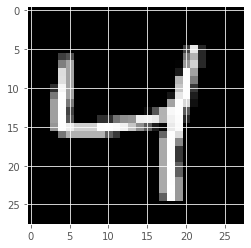

In [5]:
single_image = pixal_values[2, :].reshape(28, 28)
plt.imshow(single_image, cmap = "gray")

In [6]:
tsne = manifold.TSNE(n_components = 2, random_state = 2021)
transformed_data = tsne.fit_transform(pixal_values[: 3000, :])

In [7]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[: 3000])), columns = ["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [8]:
tsne_df.head(10)

,x,y,targets
0,19.697187,21.675064,5
1,69.423416,3.624045,0
2,-26.193182,57.121494,4
3,-38.570995,-37.709972,1
4,-31.393301,29.080669,9
5,-12.748355,-17.729580,2
6,3.506989,-63.148571,1
7,21.639429,3.027255,3
8,-0.327558,-57.943985,1
9,-26.729883,9.489244,4


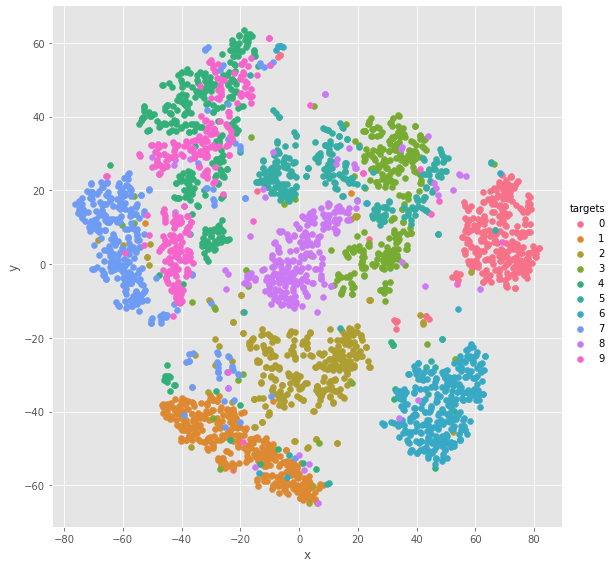

In [9]:
grid = sns.FacetGrid(tsne_df, hue = "targets", height = 8)
grid.map(plt.scatter, "x", "y").add_legend()